## Introduction to Forecasting

Setelah kita melakukan smoothing model pada data yang ada dengan berbagai model seperti SES hingga Holt-Winters maka selanjutnya kita akan menggunakan model-model ini untuk melakukan forcasting.

In [1]:
# import libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [2]:
# load dataset
airline = pd.read_csv("UDEMY_TSA_FINAL/Data/airline_passengers.csv", index_col="Month", parse_dates=True)

In [3]:
airline.index.freq = 'MS'

In [4]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [5]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
airline.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


#### Train test split

In [7]:
train = airline.loc[:'1958-01-01']
test = airline.loc['1958':]

In [8]:
train.tail()

,Thousands of Passengers
Month,
1957-09-01,404
1957-10-01,347
1957-11-01,305
1957-12-01,336
1958-01-01,340


In [9]:
test.head()

,Thousands of Passengers
Month,
1958-01-01,340
1958-02-01,318
1958-03-01,362
1958-04-01,348
1958-05-01,363


In [10]:
airline.loc['1958']

,Thousands of Passengers
Month,
1958-01-01,340
1958-02-01,318
1958-03-01,362
1958-04-01,348
1958-05-01,363
1958-06-01,435
1958-07-01,491
1958-08-01,505
1958-09-01,404


#### Build and fit Triple Exponential Smoothing model

In [11]:
tes_fitted_model = ExponentialSmoothing(train['Thousands of Passengers'],
                                        trend='mul',
                                        seasonal='mul',
                                        seasonal_periods=12).fit()

In [12]:
predictions = tes_fitted_model.forecast(36)

In [13]:
predictions

1958-02-01    331.649486
1958-03-01    388.989620
1958-04-01    380.125229
1958-05-01    388.290919
1958-06-01    453.379219
1958-07-01    502.248557
1958-08-01    490.986947
1958-09-01    424.051081
1958-10-01    365.391638
1958-11-01    318.392248
1958-12-01    360.320761
1959-01-01    369.905596
1959-02-01    359.903247
1959-03-01    422.128281
1959-04-01    412.508718
1959-05-01    421.370057
1959-06-01    492.003335
1959-07-01    545.035932
1959-08-01    532.814928
1959-09-01    460.176685
1959-10-01    396.519948
1959-11-01    345.516603
1959-12-01    391.017075
1960-01-01    401.418458
1960-02-01    390.563993
1960-03-01    458.090079
1960-04-01    447.651010
1960-05-01    457.267260
1960-06-01    533.917903
1960-07-01    591.468433
1960-08-01    578.206301
1960-09-01    499.379888
1960-10-01    430.300130
1960-11-01    374.951727
1960-12-01    424.328458
1961-01-01    435.615952
Freq: MS, dtype: float64

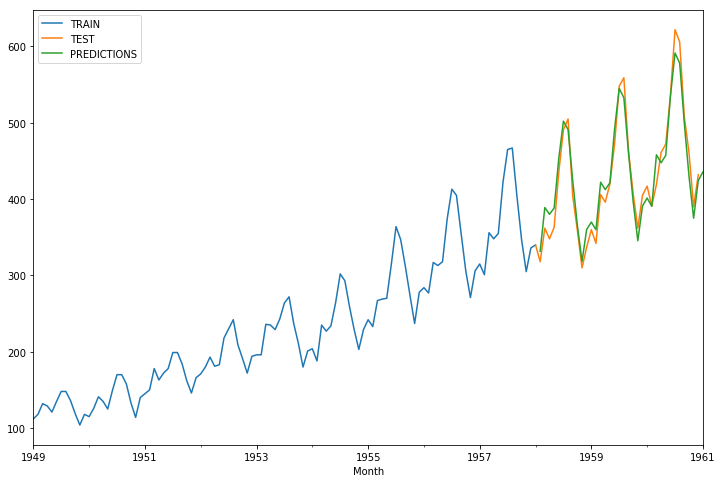

In [14]:
train['Thousands of Passengers'].plot(figsize=(12, 8), legend=True, label="TRAIN").autoscale(axis='x', tight=True)
test['Thousands of Passengers'].plot(figsize=(12, 8), legend=True, label="TEST")
predictions.plot(legend=True, label="PREDICTIONS")

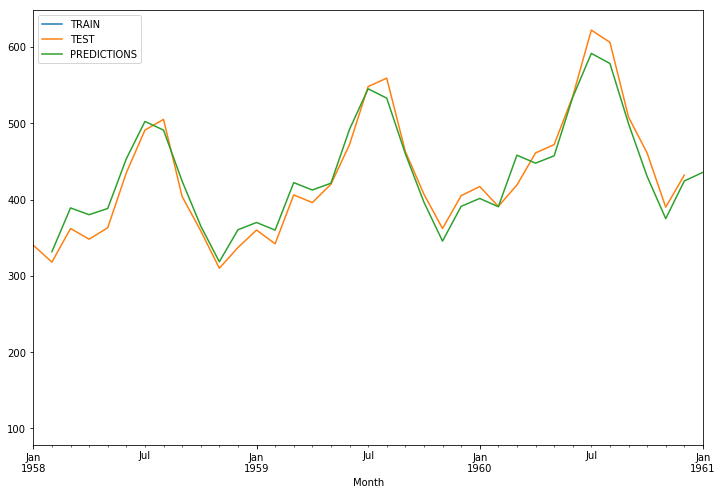

In [15]:
# compare test and predictions data (visualization)
train['Thousands of Passengers'].plot(figsize=(12, 8), legend=True, label="TRAIN").autoscale(axis='x', tight=True)
test['Thousands of Passengers'].plot( legend=True, label="TEST")
predictions.plot(legend=True, label="PREDICTIONS", xlim=["1958-01-01", "1961-01-01"])

#### Evaluating Predictions

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
mae = mean_absolute_error(test, predictions)
mae

46.30290459904356

In [18]:
mse = mean_squared_error(test, predictions)
mse

3075.328474184122

In [19]:
rmse = np.sqrt(mse)
rmse

55.45564420493303

Let's say we are satisfied with this model.

#### Build and fit final model

In [20]:
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [21]:
tes_final_model = ExponentialSmoothing(airline['Thousands of Passengers'],
                                       trend='mul',
                                       seasonal='mul',
                                       seasonal_periods=12).fit()

In [22]:
final_forecast = tes_final_model.forecast(36)

In [23]:
final_forecast

1961-01-01    450.684192
1961-02-01    424.829059
1961-03-01    475.518688
1961-04-01    504.074491
1961-05-01    517.880117
1961-06-01    590.161970
1961-07-01    684.235836
1961-08-01    678.043199
1961-09-01    567.115642
1961-10-01    507.822117
1961-11-01    434.725254
1961-12-01    485.988459
1962-01-01    502.759262
1962-02-01    473.916654
1962-03-01    530.463302
1962-04-01    562.318634
1962-05-01    577.719454
1962-06-01    658.353236
1962-07-01    763.297027
1962-08-01    756.388851
1962-09-01    632.643981
1962-10-01    566.499285
1962-11-01    484.956321
1962-12-01    542.142820
1963-01-01    560.851434
1963-02-01    528.676158
1963-03-01    591.756584
1963-04-01    627.292694
1963-05-01    644.473029
1963-06-01    734.423778
1963-07-01    851.493477
1963-08-01    843.787085
1963-09-01    705.743904
1963-10-01    631.956407
1963-11-01    540.991422
1963-12-01    604.785633
Freq: MS, dtype: float64

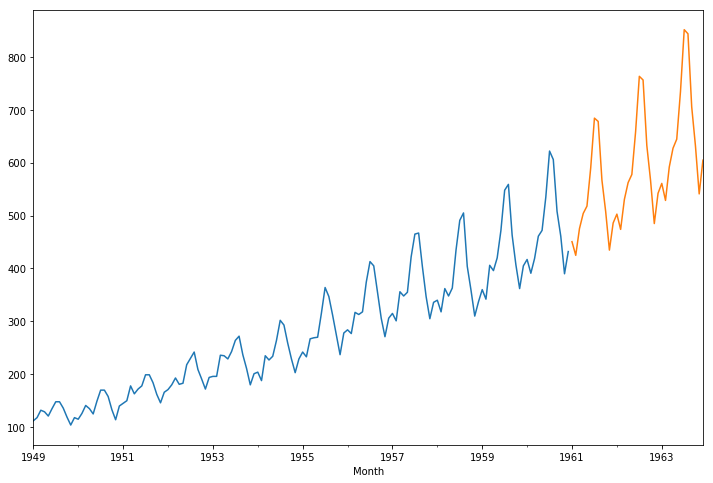

In [24]:
airline['Thousands of Passengers'].plot(figsize=(12, 8)).autoscale(axis='x', tight=True)
final_forecast.plot()

#### Stationarity
Time series data is said to be stationary if it does not exhibit trends or seasonality. That is, fluctuations in the data are entirely due to outside forces and noise.

---
Data deret waktu dikatakan stasioner jika tidak menunjukkan tren atau *seasonality*. Artinya, fluktuasi data sepenuhnya disebabkan oleh *force* dan *noise* luar.

In [25]:
sample_df = pd.read_csv("UDEMY_TSA_FINAL/Data/samples.csv", index_col=0, parse_dates=True)

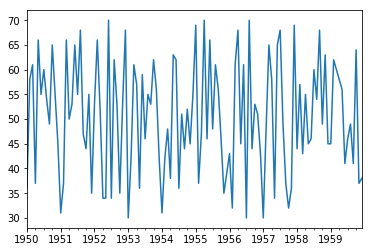

In [26]:
# stationary data
sample_df['a'].plot().autoscale(axis='x', tight=True)

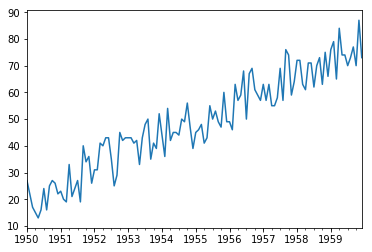

In [27]:
# non-stationary data, has trends
sample_df['b'].plot().autoscale(axis='x', tight=True)

In [28]:
sample_df

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62
1950-06-01,55,16,19,60
1950-07-01,60,24,24,53
1950-08-01,54,16,33,71
1950-09-01,49,25,44,63
1950-10-01,65,27,60,46


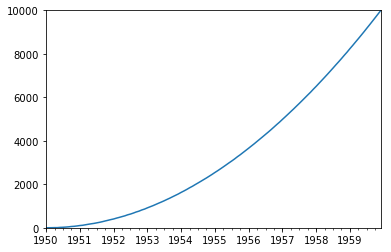

In [31]:
sample_df['c'].plot().autoscale(axis='both', tight=True)

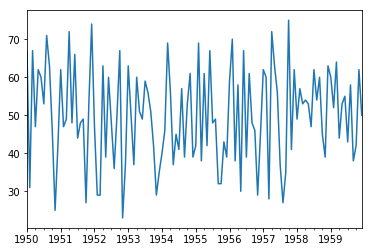

In [30]:
sample_df['d'].plot().autoscale(axis='x', tight=True)

#### Differencing
make non-stationary data to make it look stationary

In [32]:
from statsmodels.tsa.statespace.tools import diff

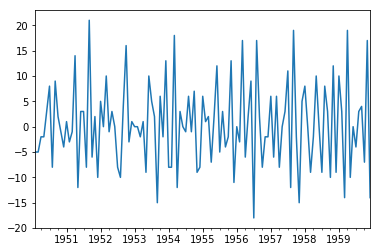

In [35]:
# first order differencing
(sample_df['b'] - sample_df['b'].shift(1)).plot().autoscale(axis='x', tight=True)

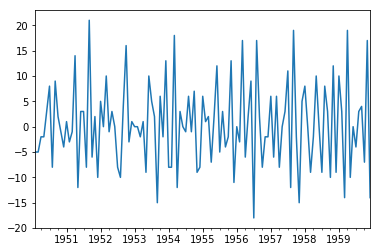

In [36]:
# others way to perform differencing
# pandas Series or DataFrame built-in .diff()
sample_df['b'].diff(periods=1).plot().autoscale(axis='x', tight=True)


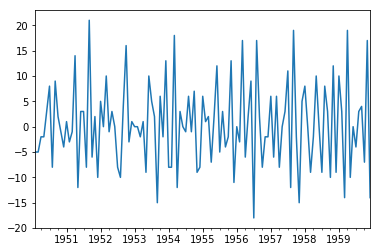

In [38]:
# others way to perform differencing
# diff() function from statsmodels
# k_diff is order of differencing
diff(sample_df['b'], k_diff=1).plot().autoscale(axis='x', tight=True) 

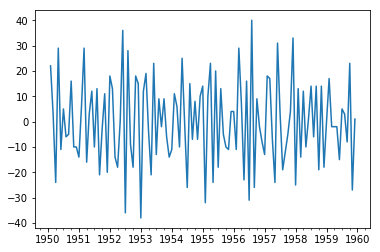

In [39]:
diff(sample_df['a'], k_diff=1).plot()

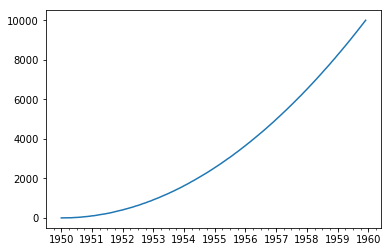

In [40]:
sample_df['c'].plot()

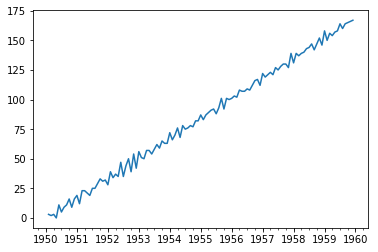

In [42]:
diff(sample_df['c'], k_diff=1).plot()

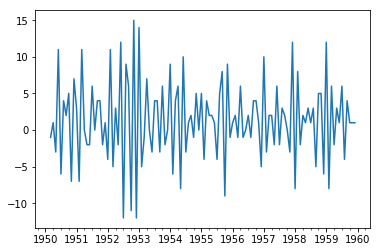

In [43]:
# second order differencing
diff(sample_df['c'], k_diff=2).plot()

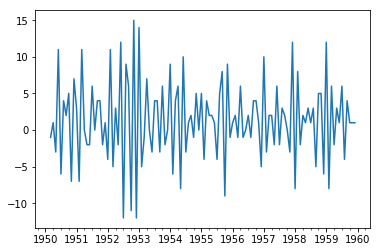

In [44]:
# if use buil-in pandas DataFrame .diff() method
sample_df['c'].diff().diff().plot()

notes from course material about lagging:  

**Lagging**  
Also known as "backshifting", lagging notation reflects the value of $y$ at a prior point in time. This is a useful technique for performing <em>regressions</em> as we'll see in upcoming sections.

\begin{split}L{y_t} = y_{t-1} & \text{      one lag shifts the data back one period}\\
L^{2}{y_t} = y_{t-2} & \text{      two lags shift the data back two periods} \end{split}
<br><br>
<table>
<tr><td>$y_t$</td><td>6</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-1}$</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-2}$</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
</table>
